This CSV dataset contains information pertaining to various Zomato restaurants in Mumbai, like restaurant names, cuisine, ratings,
votes, location, etc.
This dataset will help you with answering various questions, like which is the highest rated Seafood Restaurant, or which locality has
the best Japanese restaurants, and so on.

# 1. Importing the libraries

In [1]:
!pip install plotly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"

# 2. Importing the dataset

In [3]:
raw_df = pd.read_csv('Zomato_Mumbai_Dataset.csv',delimiter='|')


In [4]:
raw_df.head()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


# 3. Getting Basic Information about the Dataset

In [5]:
raw_df.shape

(15081, 12)

In [6]:
raw_df.shape[1]

12

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15081 entries, 0 to 15080
Data columns (total 12 columns):
NAME               15081 non-null object
PRICE              15080 non-null object
CUSINE_CATEGORY    15079 non-null object
CITY               15080 non-null object
REGION             15080 non-null object
URL                15080 non-null object
PAGE NO            15080 non-null object
CUSINE TYPE        15080 non-null object
TIMING             15015 non-null object
RATING_TYPE        15080 non-null object
RATING             15080 non-null object
VOTES              15080 non-null object
dtypes: object(12)
memory usage: 1.4+ MB


In [8]:
raw_df.describe()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
count,15081,15080,15079,15080,15080,15080,15080,15080,15015,15080,15080,15080
unique,12720,67,3183,2,241,13823,944,23,2551,32,35,1124
top,NAME,400,CUSINE_CATEGORY,Mumbai,REGION,URL,PAGE NO,Quick Bites,11am to 11pm(Mon-Sun),Average,-,-
freq,942,2042,942,14138,942,942,942,5262,1192,5112,2360,2360


# 4. Cleaning the Dataset
a. Removing the redundunt rows of data

In [9]:
# Checking redundunt rows of data
wrong_data = raw_df['PAGE NO'] == 'PAGE NO'
raw_df[wrong_data]

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
31,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
47,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
63,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
79,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
...,...,...,...,...,...,...,...,...,...,...,...,...
15000,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15016,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15032,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15048,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES


In [10]:
## Performing Negation of the wrong dataset and then storing the correct data back in the raw_df DataFrame
## This permamnently remove the wrong data from the original dataframe
raw_df = raw_df[~wrong_data]

In [11]:
# Dropping columns which are not required for further analysis
raw_df.drop(['URL', 'PAGE NO', 'CITY'], axis = 1, inplace=True)

In [12]:
raw_df.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


# b. Removing the Null Records

In [13]:
# Checking for Null records
raw_df.isnull().sum()


NAME                0
PRICE               1
CUSINE_CATEGORY     2
REGION              1
CUSINE TYPE         1
TIMING             66
RATING_TYPE         1
RATING              1
VOTES               1
dtype: int64

In [14]:
# Checking for a null row
raw_df[raw_df['PRICE'].isnull()]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15080,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Droping the above row from the dataset
raw_df = raw_df.drop(labels=15080, axis=0)

In [16]:
# Replacing the other null records with NA 
raw_df.fillna('NA', inplace=True)


In [17]:
# Confirming all the null records are correct 
raw_df.isnull().sum()


NAME               0
PRICE              0
CUSINE_CATEGORY    0
REGION             0
CUSINE TYPE        0
TIMING             0
RATING_TYPE        0
RATING             0
VOTES              0
dtype: int64

# c. Converting the DataTypes of numerical columns to numeric dataype

In [18]:
# Checking for text values in the column before converting it to numeric datatype
raw_df['RATING'].value_counts()

-          2360
3.5        1094
3.4        1036
3.6         960
NEW         953
3.3         926
3.7         917
3.2         801
3.8         782
3.1         734
3.0         622
3.9         596
2.9         409
4.0         408
2.8         309
4.1         298
4.2         199
2.7         170
4.3         148
4.4          99
2.6          77
Opening      57
4.5          46
2.5          39
4.6          32
2.4          26
4.7          13
2.3          10
2.1           5
4.8           4
2.2           4
4.9           2
1.8           1
2.0           1
Name: RATING, dtype: int64

In [19]:
# Replacing the text values with '0'
raw_df['RATING'].replace(to_replace=['-','NEW','Opening'], value='0', inplace=True)

In [20]:
# Changing Data Type of the numerical columns

raw_df['PRICE'] = raw_df['PRICE'].astype('int64')
raw_df['RATING'] = raw_df['RATING'].astype('float64')
raw_df['VOTES'] = pd.to_numeric(raw_df['VOTES'], errors='coerce')

# Convert the 'VOTES' column to 'int64' after handling NaN values
raw_df['VOTES'] = raw_df['VOTES'].fillna(0).astype('int64')


In [21]:
raw_df.dropna(subset=['VOTES'], inplace=True)
raw_df['VOTES'] = raw_df['VOTES'].astype('int64')


In [22]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14138 entries, 0 to 15079
Data columns (total 9 columns):
NAME               14138 non-null object
PRICE              14138 non-null int64
CUSINE_CATEGORY    14138 non-null object
REGION             14138 non-null object
CUSINE TYPE        14138 non-null object
TIMING             14138 non-null object
RATING_TYPE        14138 non-null object
RATING             14138 non-null float64
VOTES              14138 non-null int64
dtypes: float64(1), int64(2), object(6)
memory usage: 1.1+ MB


# d. Working with 'Timing' column

In [23]:
raw_df['TIMING'].value_counts()

11am to 11pm(Mon-Sun)                           1192
11am to 12midnight(Mon-Sun)                      632
12noon to 12midnight(Mon-Sun)                    467
11am to 1130pm(Mon-Sun)                          309
10am to 10pm(Mon-Sun)                            267
                                                ... 
9am to 230pm,5pm to 1030pm(Mon-Sun)                1
10am to 10pm(Mon),11am to 10pm(Tue-Sun)            1
630am to 930pm(Mon-Sun)                            1
11am to 1130pm(Mon),830am to 1130pm(Tue-Sun)       1
10am to 3pm,6pm to 930pm(Mon-Sun)                  1
Name: TIMING, Length: 2551, dtype: int64

In [24]:
#Splitting the column and storing it in temp_df dataframe 
temp_df = raw_df['TIMING'].str.split("(", n = 1, expand = True)
temp_df

,0,1
0,12noon to 130am,Mon-Sun)
1,2pm to 1am,Mon-Sun)
2,12noon to 1am,Mon-Sun)
3,12noon to 130am,Mon-Sun)
4,1130am to 1am,Mon-Sun)
...,...,...
15075,"8am to 11pm,12midnight to 115am",Mon-Sun)
15076,11am to 230am,Mon-Sun)
15077,11am to 11pm,"Mon,Tue,Wed,Thu,Sun),11am to ..."
15078,9am to 1230AM,Mon-Sun)


In [25]:
# Assigning the columns back to the raw_df dataframe
raw_df['TIMING'] = temp_df[0]
raw_df['DAYS_OPEN'] = temp_df[1]
raw_df.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun)
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun)
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun)
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun)
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am,Veľmi dobré,4.4,5995,Mon-Sun)


In [26]:
# Removing the bracket character from Days column
raw_df['DAYS_OPEN'] = raw_df['DAYS_OPEN'].str.replace(')','',regex=True)
raw_df.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am,Veľmi dobré,4.4,5995,Mon-Sun


In [27]:
# Checking for Null records in DAYS_OPEN column
raw_df.isnull().sum()

NAME                 0
PRICE                0
CUSINE_CATEGORY      0
REGION               0
CUSINE TYPE          0
TIMING               0
RATING_TYPE          0
RATING               0
VOTES                0
DAYS_OPEN          160
dtype: int64

In [28]:
# Replacing the Null values with 'NA'
raw_df.fillna('NA', inplace=True)


In [29]:
# Checking info of all the columns
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14138 entries, 0 to 15079
Data columns (total 10 columns):
NAME               14138 non-null object
PRICE              14138 non-null int64
CUSINE_CATEGORY    14138 non-null object
REGION             14138 non-null object
CUSINE TYPE        14138 non-null object
TIMING             14138 non-null object
RATING_TYPE        14138 non-null object
RATING             14138 non-null float64
VOTES              14138 non-null int64
DAYS_OPEN          14138 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 1.2+ MB


# e. Removing the restaurant records whose Rating or Votes is 0

In [30]:
# Finding those restaurant whose has 0 Rating or Votes
useless_data = (raw_df['RATING'] == 0.0) | (raw_df['VOTES'] == 0)
raw_df[useless_data]


,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
32,Hotel Annapoorna Refreshments,400,"Maharashtrian,Mughlai,Chinese",Ghansoli,Quick Bites,1030am to 1230AM,Not rated,0.0,0,Mon-Sun
34,Biryani 9,600,"Biryani,North Indian",Near Andheri East Station,none,11am to 3am,None,0.0,0,Mon-Sun
36,D Fusion Flavours,350,Chinese,Goregaon East,none,"12noon to 330pm,7pm to 3am",None,0.0,0,Mon-Sun
39,Nation Tadka,400,"North Indian,South Indian,Chinese,Fast Food",Worli,none,12noon to 1230AM,Not rated,0.0,0,Mon-Sun
83,Link Way Restaurant,500,"North Indian,Chinese",Jogeshwari,Quick Bites,"12noon to 4pm,8pm to 1am",Not rated,0.0,0,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14998,Foodies House,0,Chinese,Goregaon East,none,12noon to 4am,None,0.0,0,Mon-Sun
14999,Khansama,0,Biryani,Lower Parel,none,12noon to 3am,None,0.0,0,Mon-Sun
15010,Earth Cafe @ Waterfield,800,"Cafe,Healthy Food,Italian,Pizza,Beverages",Linking Road-- Bandra West,Café,10am to 10pm,None,0.0,0,"Mon-Thu,10am to 11pm(Fri-Sun"
15023,How About Some Cream,200,Beverages,Mumbai Central,Beverage Shop,12noon to 3am,None,0.0,0,Mon-Sun


In [31]:
## Performing Negation of the useless dataset and then storing the correct data back in the raw_df DataFrame
## This permamnently remove the wrong data from the original dataframe
raw_df = raw_df[~useless_data]

# f. Working on 'RATING_TYPE' Column

In [32]:
# Checking the unique values in the column
raw_df['RATING_TYPE'].value_counts()

Average          5111
Good             4330
Very Good        1137
Excellent          95
Poor               47
Veľmi dobré         6
Dobrze              4
Skvělá volba        4
Bardzo dobrze       3
Bueno               2
İyi                 2
Muito Bom           2
Bom                 2
Ortalama            2
Buono               2
Dobré               2
Průměr              2
Priemer             2
Promedio            2
Baik                1
Velmi dobré         1
Skvělé              1
Excelente           1
Sangat Baik         1
Média               1
Biasa               1
Media               1
Çok iyi             1
Muy Bueno           1
Name: RATING_TYPE, dtype: int64

In [33]:
# Translating the texts into proper English text
raw_df['RATING_TYPE'].replace(to_replace='Excelente' , value='Excellent', inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Veľmi dobré','Bardzo dobrze','Muy Bueno','Velmi dobré'] , value='Very Good', inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Skvělá volba','Dobrze','Bueno','Buono','Dobré','Bom','Skvělé'] , value='Good', inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Priemer','Média','Çok iyi'] , value='Average', inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Průměr','Promedio','Ortalama','Muito Bom','İyi'] , value='Poor', inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Baik','Biasa','Media','Sangat Baik'] , value='Very Poor', inplace=True)


In [34]:
# Checking all the values correctly mapped
raw_df['RATING_TYPE'].value_counts()


Average      5115
Good         4347
Very Good    1148
Excellent      96
Poor           57
Very Poor       4
Name: RATING_TYPE, dtype: int64

# g. Working on 'REGION' Column

In [35]:
raw_df['REGION'].value_counts()

Mira Road                              405
Malad West                             308
Chembur                                277
Kharghar                               268
Borivali West                          264
                                      ... 
K Star Mall-- Chembur                    1
Atria Mall-- Worli                       1
Hotel King's International-- Juhu        1
Hotel Sai Palace Grand-- Malad West      1
Ramee Guestline Hotel-- Dadar            1
Name: REGION, Length: 237, dtype: int64

In [36]:
# Removing the irrelevant text from the Region column
raw_df['REGION'] = raw_df['REGION'].str.replace('[a-zA-Z].+-- ','',regex=True)

In [37]:
raw_df['REGION'].value_counts()

Thane West           712
Mira Road            412
Andheri West         407
Malad West           316
Bandra West          282
                    ... 
Andheri East           2
CBD Belapur            1
Girgaon Chowpatty      1
Dadar                  1
Goregaon               1
Name: REGION, Length: 120, dtype: int64

In [38]:
# Replacing Small regions with Known region name
raw_df['REGION'] = raw_df['REGION'].str.replace('4 Bungalows|7 Andheri|Azad Nagar|Near Andheri Station|Veera Desai Area', 'Andheri', regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Bandra Kurla Complex','Bandra',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('CBD-Belapur','CBD Belapur',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Girgaon Chowpatty','Chowpatty',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Dadar Shivaji Park','Dadar',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Flea Bazaar Café|Kamala Mills Compound','Lower Parel',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Runwal Green','Mulund',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Mumbai CST Area','Mumbai Central',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Kopar Khairane|Seawoods|Turbhe|Ulwe','Navi Mumbai',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('New Panvel|Old Panvel','Panvel',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Kamothe','Sion',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Ghodbunder Road|Majiwada','Thane',regex=True)

# h. Removing Duplicate records

In [39]:
# Finding all the duplicate rows
raw_df[raw_df.duplicated()]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
4064,Sai Sannidhi Restaurant & Bar,1000,"North Indian,Konkan",Dahisar East,Casual Dining,11am to 12midnight,Good,3.7,99,Mon-Sun
4068,Konkan Katta,400,"Seafood,Maharashtrian,Malwani",Mahakali,Quick Bites,"11am to 330pm,630pm to 1130pm",Good,3.5,181,Mon-Sun
4082,Usmaniya Hotel,600,Mughlai,Fort,Casual Dining,1030am to 1130pm,Average,3.2,8,Mon-Sun
4083,Gina's Cakes,450,Bakery,Dombivali West,none,11am to 11pm,Good,3.5,49,Mon-Sun
4084,Konkanastha Lunch Home,400,"Seafood,Malwani",Chakala,Casual Dining,"12noon to 3pm,730pm to 1030pm",Good,3.5,44,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14200,Mezbaan Family Restaurant,350,"Chinese,Mughlai",Mumbra,Dhaba,12noon to 1230AM,Average,2.8,97,Mon-Sun
14204,Jyoti Lunch Home,650,"Chinese,North Indian,Seafood,Mughlai",Mulund West,Casual Dining,11am to 1230AM,Good,3.5,49,Mon-Sun
14253,On Toes,900,"Italian,North Indian,Chinese",Malad West,Casual Dining,"12noon to 3pm,7pm to 1230AM",Good,3.6,76,Mon-Sun
14761,Frosty Farm,400,"Ice Cream,Desserts,Fast Food",Malad East,Dessert Parlor,1pm to 1215AM,Good,3.6,120,Mon-Sun


In [40]:
# Dropping all the duplicate rows
raw_df = raw_df.drop_duplicates()


# 4. Copying the cleaned data into a new DataFrame

In [41]:
zomato_df = raw_df.copy()

In [42]:
zomato_df.head()


,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar,1130am to 1am,Very Good,4.4,5995,Mon-Sun


# 5. Performing Exploratory Data Analysis
Q1) How many restaurants are in Mumbai for each type of cuisine?

In [43]:
! pip install -U kaleido

In [44]:
pip install -U plotly

Note: you may need to restart the kernel to use updated packages.


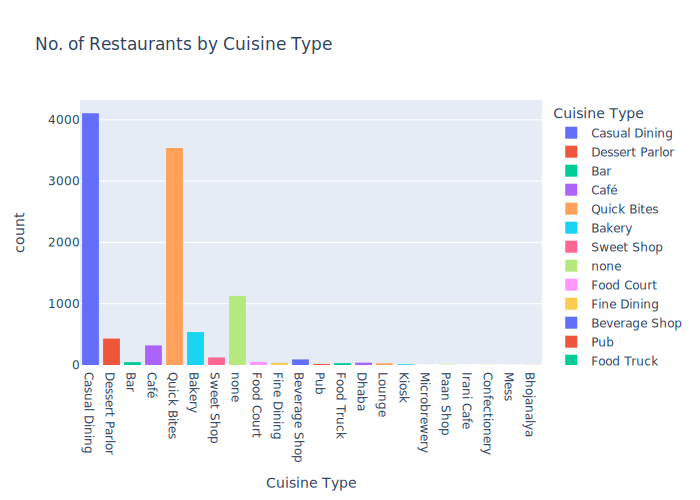

In [45]:
fig = px.histogram(zomato_df, x='CUSINE TYPE', color='CUSINE TYPE',
     title= 'No. of Restaurants by Cuisine Type',
     labels={'CUSINE TYPE':'Cuisine Type'})
fig.show()


# Q2) What are the percentage of restaurants by Rating Type in Mumbai

In [46]:
rating_type_df = zomato_df['RATING_TYPE'].value_counts().reset_index()
rating_type_df.rename(columns={'index':'RATING TYPE', 'RATING_TYPE':'COUNT OF RESTAURANTS'}, inplace=True)
rating_type_df

,RATING TYPE,COUNT OF RESTAURANTS
0,Average,4983
1,Good,4263
2,Very Good,1145
3,Excellent,96
4,Poor,56
5,Very Poor,4


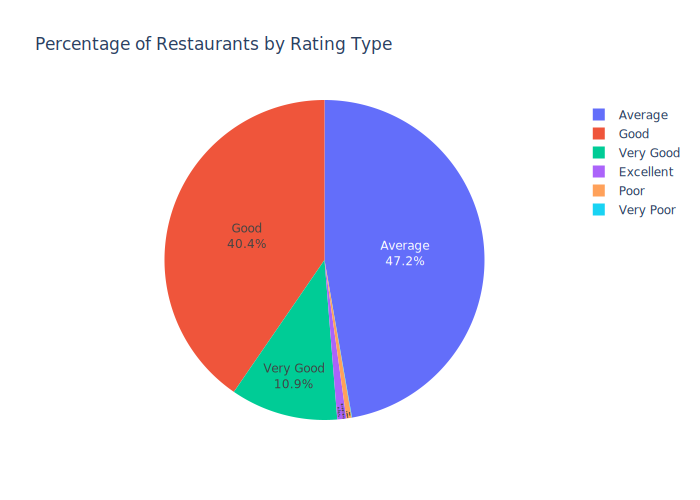

In [47]:
fig = px.pie(rating_type_df, names='RATING TYPE', values='COUNT OF RESTAURANTS', color='RATING TYPE',
 title='Percentage of Restaurants by Rating Type').update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Q3) Which are the Top 10 highest rated Seafood Restaurant in Mumbai?

In [48]:
seafood_df = zomato_df[zomato_df['CUSINE_CATEGORY'].str.contains('Seafood')]
seafood_df.sort_values(by='RATING',ascending=False).head(10)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
7104,Thangabali,1000,"Seafood,South Indian,Mangalorean,Andhra,Kerala",Khar,Bar,"12noon to 4pm,7pm to 3am",Excellent,4.7,564,Mon-Sun
76,Ceremonial Kitchen & Co,1000,"Seafood,Maharashtrian,North Indian,Chinese",Thane,Casual Dining,1130am to 1130pm,Excellent,4.6,350,Mon-Sun
13685,Maharashtra Lunch Home,600,"Maharashtrian,Malwani,Konkan,Seafood",Kharghar,Casual Dining,"11am to 345pm,7pm to 1145pm",Excellent,4.6,209,Mon-Sun
12433,Quarter Canteen,1100,"North Indian,Seafood,Chinese",Bandra West,Casual Dining,"12noon to 330pm,7pm to 1am",Excellent,4.5,573,Mon-Sun
902,The Harbour Bay - SeaFood Kitchen & Bar,2400,"Seafood,Beverages",Bandra West,Casual Dining,12noon to 1am,Excellent,4.5,100,Mon-Sun
884,Rajmanya- Seafood family restaurant,800,"Maharashtrian,Konkan,Seafood",Vashi,Casual Dining,11am to 11pm,Excellent,4.5,178,Mon-Sun
3380,Peco Peco,700,"Chinese,Seafood,Asian",Powai,none,"12noon to 330pm,7pm to 1230AM",Excellent,4.5,497,Mon-Sun
9954,Pi Bar and Kitchen,1600,"Continental,European,Italian,Seafood,Pizza,Des...",Andheri West,Bar,"12noon to 6pm,7pm to 12midnight",Excellent,4.5,2068,Mon-Sun
903,Ferry Wharf,1500,"Seafood,Mangalorean",Bandra West,Casual Dining,"11am to 330pm,7pm to 1230AM",Very Good,4.4,459,Mon-Sun
915,Monis Bar and Restaurant,1000,"North Indian,Chinese,Continental,Seafood,Bever...",Thane West,Casual Dining,"1130am to 330pm,6pm to 1130pm",Very Good,4.4,662,Mon-Sun


# Q4) Which is the best Food Truck in Mumbai?

In [49]:

foodtruck_df = zomato_df[zomato_df['CUSINE TYPE'] == 'Food Truck']
foodtruck_df.sort_values(by='RATING',ascending=False).head(2)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
262,Dumpling Delights,200,Momos,Matunga East,Food Truck,430pm to 930pm,Very Good,4.3,212,Mon-Sun
1017,Street Food Co.,250,"Fast Food,Chinese",Virar,Food Truck,6pm to 3am,Very Good,4.1,274,Mon-Sun


# Q5) Which places have the highest rated restaurant for each Cuisine Type in Mumbai?

In [50]:
# Assuming restaurants having rating above 4.5
highest_rated_df = zomato_df[zomato_df['RATING'] >= 4.5]
highest_rated_df


,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
6,Persian Darbar,1300,"Biryani,North Indian,Chinese,Mughlai",Marol,Casual Dining,10am to 3am,Excellent,4.5,3058,Mon-Sun
7,Tanatan,1500,Modern Indian,Juhu,Casual Dining,12noon to 130am,Excellent,4.7,1842,Mon-Sun
9,Plum by Bent Chair,1800,Asian,Lower Parel,Casual Dining,12noon to 1am,Excellent,4.7,1876,Mon-Sun
10,Angrezi Dhaba,1500,"North Indian,Chinese,Thai,European",Dadar West,Bar,12noon to 1am,Excellent,4.5,2092,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14228,Zaika Crave - Club Aquaria,1300,"North Indian,Continental,Chinese,Desserts",Borivali West,Casual Dining,"11am to 330pm,7pm to 1130pm",Excellent,4.5,1302,"Mon,Tue,Wed..."
14234,Cone Culture,250,European,Kharghar,Casual Dining,Closed,Excellent,4.6,492,"Mon,12noon to 11pm(Tue-Sun"
15007,Dessertino,300,"Desserts,Ice Cream",Kandivali West,Dessert Parlor,11am to 12midnight,Excellent,4.8,184,Mon-Sun
15051,Tick-eat,800,"North Indian,Italian,Chinese,Mexican,Lebanese",Mulund West,Casual Dining,"1130am to 330pm,7pm to 1130pm",Excellent,4.5,754,Mon-Sun


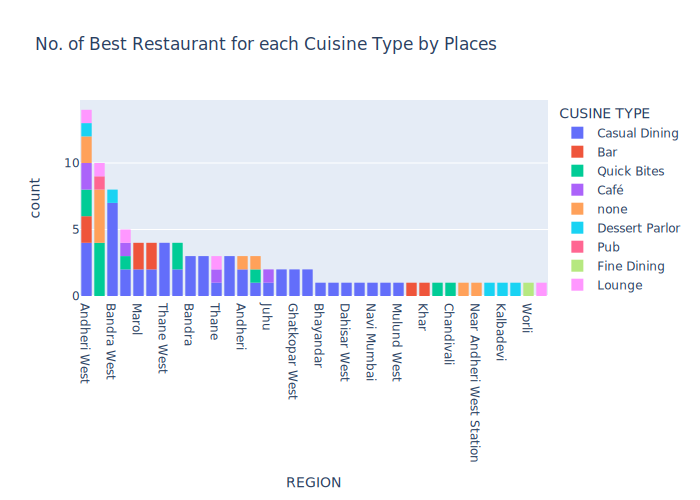

In [51]:

fig = px.histogram(highest_rated_df, x='REGION', color='CUSINE TYPE',
                   title='No. of Best Restaurant for each Cuisine Type by Places')
fig.update_xaxes(categoryorder="total descending")
fig.show()


# Q6) What is the Avg Price Distibution of highest rated restaurant for each Cuisine Type in Mumbai?


In [52]:
highest_rated_price_df = highest_rated_df.groupby(by=['REGION', 'CUSINE TYPE'])['PRICE'].mean().reset_index()
highest_rated_price_df.head()

,REGION,CUSINE TYPE,PRICE
0,Andheri,Casual Dining,1100.0
1,Andheri,none,350.0
2,Andheri West,Bar,1600.0
3,Andheri West,Café,800.0
4,Andheri West,Casual Dining,1212.5


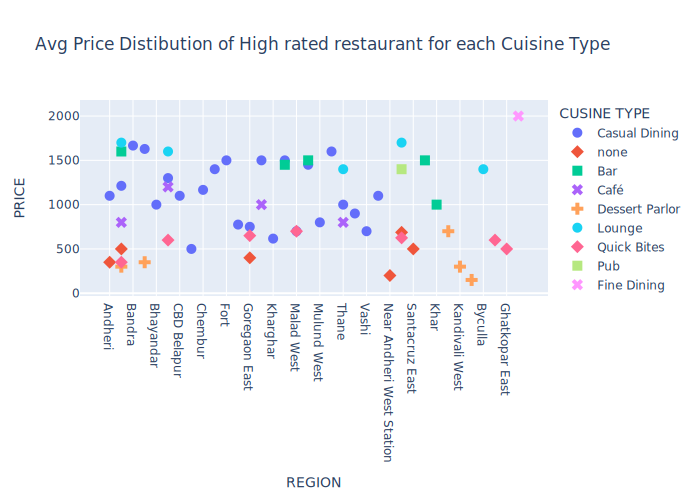

In [53]:
fig = px.scatter(highest_rated_price_df, x="REGION", y="PRICE", color="CUSINE TYPE", symbol="CUSINE TYPE",
 title=' Avg Price Distibution of High rated restaurant for each Cuisine Type')
fig.update_traces(marker_size=10)
fig.show()

# Q7) Which areas have a large number of Chinese Restaurant Market?


In [54]:
chinese_df = zomato_df[zomato_df['CUSINE_CATEGORY'].str.contains('Chinese')]
chinese_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar,1130am to 1am,Very Good,4.4,5995,Mon-Sun
5,Flea Bazaar Café,800,"American,Asian,Street Food,North Indian,Luckno...",Lower Parel,Café,12noon to 1am,Very Good,4.2,2042,Mon-Sun
6,Persian Darbar,1300,"Biryani,North Indian,Chinese,Mughlai",Marol,Casual Dining,10am to 3am,Excellent,4.5,3058,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
15071,Lucknow Zaika,500,"North Indian,Chinese",Kurla,Quick Bites,12noon to 2am,Average,2.6,36,Mon-Sun
15072,Zuha's Kitchen,400,"Chinese,North Indian,Mughlai",Mumbai Central,Quick Bites,"12noon to 4pm,730pm to 430am",Average,3.3,13,Mon-Sun
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Andheri West,Casual Dining,"8am to 11pm,12midnight to 115am",Good,3.5,267,Mon-Sun
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali West,Quick Bites,11am to 230am,Good,3.7,64,Mon-Sun


In [55]:
chinese_rest_df = chinese_df.groupby(by='REGION').agg({'NAME' : 'count', 'PRICE' : 'mean'}).rename(columns= {'NAME' : 'COUNT OF RESTAURANTS'})
chinese_rest_df = chinese_rest_df.sort_values('COUNT OF RESTAURANTS', ascending=False).head(25)
chinese_rest_df.head()


,COUNT OF RESTAURANTS,PRICE
REGION,,
Thane West,341,589.017595
Mira Road,224,553.348214
Andheri West,161,657.142857
Chembur,152,604.934211
Malad West,143,641.608392


In [60]:


# Assuming chinese_df is your original DataFrame
chinese_rest_df = chinese_df.groupby(by='REGION').agg({'NAME': 'count', 'PRICE': 'mean'}).rename(columns={'NAME': 'COUNT OF RESTAURANTS'})
chinese_rest_df = chinese_rest_df.sort_values('COUNT OF RESTAURANTS', ascending=False).head(25)

# Resetting the index to make 'REGION' a column again
chinese_rest_df.reset_index(inplace=True)

# Print the columns before creating the chart
print(chinese_rest_df.columns)

Index(['REGION', 'COUNT OF RESTAURANTS', 'PRICE'], dtype='object')


In [62]:
chinese_rest_df.head()

,REGION,COUNT OF RESTAURANTS,PRICE
0,Thane West,341,589.017595
1,Mira Road,224,553.348214
2,Andheri West,161,657.142857
3,Chembur,152,604.934211
4,Malad West,143,641.608392


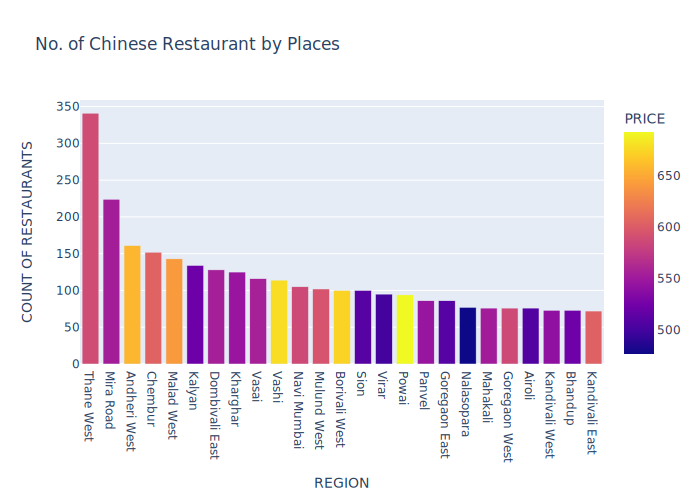

In [63]:
fig = px.bar(chinese_rest_df, x ='REGION', y='COUNT OF RESTAURANTS', color='PRICE', title= 'No. of Chinese Restaurant by Places')
fig.show()

In [64]:
print(chinese_rest_df.columns)


Index(['REGION', 'COUNT OF RESTAURANTS', 'PRICE'], dtype='object')


# Q8) Is there a relation between Price and Rating by each Cuisine Type?

In [65]:
price_rating_df = zomato_df.groupby(['CUSINE TYPE', 'RATING'])['PRICE'].mean().reset_index()
price_rating_df


,CUSINE TYPE,RATING,PRICE
0,Bakery,2.7,400.000000
1,Bakery,2.8,285.714286
2,Bakery,2.9,328.571429
3,Bakery,3.0,300.000000
4,Bakery,3.1,369.117647
...,...,...,...
278,none,4.3,683.333333
279,none,4.4,555.000000
280,none,4.5,420.000000
281,none,4.6,687.500000


# Q9) Is there a relation between Region and Price?

In [66]:
region_price_df = zomato_df.groupby(['REGION'])['PRICE'].mean().reset_index()
region_price_df

,REGION,PRICE
0,Airoli,452.287582
1,Alibaug,665.000000
2,Ambernath,514.000000
3,Andheri,579.779412
4,Andheri East,1350.000000
...,...,...
99,Vile Parle East,487.368421
100,Vile Parle West,433.802817
101,Virar,452.027027
102,Wadala,427.500000


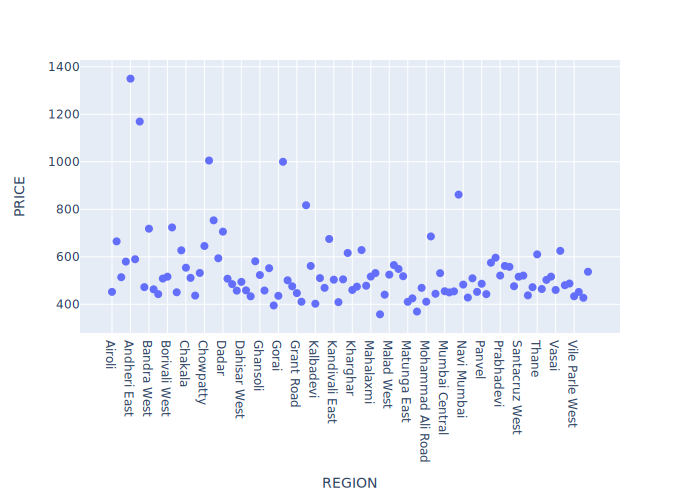

In [67]:
fig = px.scatter(region_price_df, x="REGION", y="PRICE").update_traces(marker_size=8)
fig.show()


# Q10) Find the list of Affordable Restaurants?
The criteria for Affordable Restaurants would be:-
1) Low Price 2) High Rated
First step will be to find the restaurants with average cost 1/4th the average cost of most expensive restaurant in our dataframe.
Let me explain:-The most expensive restaurant has an average meal cost= 6000. We'll try to stay economical and only pick the
restaurants that are 1/4th of 6000

In [68]:
max_price = zomato_df['PRICE'].max()
one_fourth_price = max_price/4
one_fourth_price

1250.0

In [69]:
# Finding list of restaurants that have price less than and equal to 1/4th of the max price i.e Finding Cheap Restaurant
aff_rest_df = zomato_df[['NAME', 'PRICE', 'CUSINE_CATEGORY', 'REGION', 'CUSINE TYPE']]
aff_rest_df = aff_rest_df[aff_rest_df['PRICE'] <= 1250]
aff_rest_df.sort_values(by='PRICE', inplace=True)
aff_rest_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE
6137,Sanjog Wine N Dine,5,"North Indian,Chinese",Thane West,Casual Dining
2925,Jab We Eat,50,"South Indian,North Indian,Maharashtrian,Fast Food",Girgaum,none
9598,Ho5 Store,50,Fast Food,Matunga West,none
9589,Golden Butterfly,100,"Bakery,Desserts",Mira Road,Bakery
5916,Madhuri Puranpoli,100,Maharashtrian,Vile Parle East,none
...,...,...,...,...,...
2740,Peninsula Next,1200,"North Indian,Mughlai,Chinese",Sion,Casual Dining
5528,The Thekka,1200,"Finger Food,Continental,North Indian,Chinese",Vashi,Lounge
964,Bijoli Grill,1250,Bengali,Powai,Casual Dining
6045,Fabelle at The Chocolate Boutique - ITC Grand ...,1250,Desserts,Parel,Dessert Parlor


In [70]:

# Finding the highest rated list of restaurants
highrate_rest_df = zomato_df[['NAME', 'PRICE', 'CUSINE_CATEGORY', 'REGION', 'CUSINE TYPE','RATING']]
highrate_rest_df = highrate_rest_df[highrate_rest_df['RATING'] >= 4.5]
highrate_rest_df.sort_values(by='PRICE', inplace=True)
highrate_rest_df


,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,RATING
1502,Cake Centre-The Dessert Maker,150,Desserts,Mohammad Ali Road,Dessert Parlor,4.6
763,Curry And Combos Twist,200,"North Indian,Chinese",Andheri West,Quick Bites,4.5
807,Moussestruck,200,Desserts,Near Andheri West Station,none,4.5
14234,Cone Culture,250,European,Kharghar,Casual Dining,4.6
725,Belo Pops,300,"Ice Cream,Desserts,Beverages",Andheri West,none,4.5
...,...,...,...,...,...,...
5335,Mia Cucina,2000,Italian,Bandra West,Casual Dining,4.5
1786,Global Fusion,2000,"Chinese,Japanese,Asian,North Indian",Worli,Fine Dining,4.6
8887,Drifters Tap Station,2000,"North Indian,Continental,European,American",Bandra,Casual Dining,4.5
12625,House of Mandarin,2100,"Chinese,Sushi,Asian",Bandra West,Casual Dining,4.5


In [71]:
highrate_aff_df = pd.merge(aff_rest_df, highrate_rest_df, how='inner', on=['NAME', 'REGION'])
highrate_aff_df = highrate_aff_df[['NAME', 'PRICE_x', 'CUSINE_CATEGORY_x', 'REGION', 'CUSINE TYPE_x']]
highrate_aff_df.rename(columns={'NAME':'NAME', 'PRICE_x':'PRICE', 'CUSINE_CATEGORY_x':'CUSINE_CATEGORY',
 'REGION':'REGION', 'CUSINE TYPE_x':'CUSINE TYPE'},inplace=True)

# Q11) Find the list of most Reliable Restaurants?
The criteria for most Reliable Restaurants would be:-
1) Low Price 2) High Rated 3) Large No. of Votes
First step will be to find the restaurants with Votes greater than Mean of Votes

In [72]:

mean_votes = zomato_df['VOTES'].mean()
mean_votes


177.2656679624538

In [73]:
# Finding list of restaurants that have Votes greater than and equal to Mean of Vote
mean_rest_df = zomato_df[['NAME', 'PRICE', 'CUSINE_CATEGORY', 'REGION', 'CUSINE TYPE', 'VOTES']]
mean_rest_df = mean_rest_df[mean_rest_df['VOTES'] > 177]
mean_rest_df.sort_values(by='VOTES', inplace=True)
mean_rest_df


,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,VOTES
4194,Sai Sagar Veg Treat,500,"North Indian,South Indian,Chinese,Fast Food,Be...",Kalyan,Casual Dining,178
884,Rajmanya- Seafood family restaurant,800,"Maharashtrian,Konkan,Seafood",Vashi,Casual Dining,178
3914,Ice Cafe,500,"Fast Food,Ice Cream,Beverages,Pizza",Borivali West,Quick Bites,178
7897,Konkan Lajjatdar,500,"Seafood,Biryani,Beverages,Chinese,Malwani,Konkan",Andheri West,Casual Dining,178
3828,Frozen Delight -The Dessert Cafe,250,"Desserts,Ice Cream",Airoli,Dessert Parlor,178
...,...,...,...,...,...,...
8539,Leopold Cafe & Bar,1600,"American,Chinese,Mughlai,Italian",Colaba,Casual Dining,7327
1251,Joey's Pizza,800,Pizza,Malad West,Quick Bites,7350
5337,Chili's American Grill & Bar,1400,"American,Mexican,Burger,Tex-Mex",Powai,Casual Dining,7377
3751,Prithvi Cafe,700,"Cafe,Fast Food",Juhu,Café,8000


These are the most reliable, highest rated and affordable restaurants:-
We obtain this dataframe by simply taking the intersection of highrate_aff_df & mean_rest_df
This dataframe obtained below shows the restaurants whose:
Cost is below 1250
Rating is above 4.5
Votes are above 177

In [75]:
reliable_rest_df = pd.merge(mean_rest_df, highrate_aff_df, how='inner', on=['NAME', 'REGION'])
reliable_rest_df = reliable_rest_df[['NAME', 'PRICE_x', 'CUSINE_CATEGORY_x', 'REGION', 'CUSINE TYPE_x']]
reliable_rest_df.rename(columns={'NAME':'NAME', 'PRICE_x':'PRICE', 'CUSINE_CATEGORY_x':'CUSINE_CATEGORY',
 'REGION':'REGION', 'CUSINE TYPE_x':'CUSINE TYPE'},inplace=True)


In [76]:
reliable_rest_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE
0,Rajmanya- Seafood family restaurant,800,"Maharashtrian,Konkan,Seafood",Vashi,Casual Dining
1,Fresh Food Co.,500,"Continental,Healthy Food,Salad,Beverages,Desse...",Santacruz East,none
2,Dessertino,300,"Desserts,Ice Cream",Kandivali West,Dessert Parlor
3,Invento,1200,"Chinese,Fast Food,North Indian,Italian,Mexican",Lower Parel,Casual Dining
4,Maharashtra Lunch Home,600,"Maharashtrian,Malwani,Konkan,Seafood",Kharghar,Casual Dining
5,Regano's,600,"Continental,Fast Food,Italian,Desserts",Malad West,Casual Dining
6,Big Bang Cuurry,350,"North Indian,Biryani,Rolls",Andheri,none
7,Sandy's Den,1000,"Fast Food,Bar Food",Chembur,Casual Dining
8,Angrezi Patiyalaa,1200,"North Indian,Finger Food,American,Mexican,Chinese",Andheri West,Casual Dining
9,Maezo,1000,Modern Indian,Thane West,Casual Dining
